In [1]:
import os
import time
import sys
import fileinput
import numpy as np
from itertools import product, combinations
from collections import OrderedDict
import matplotlib
import matplotlib.pylab as plot
import math
import glob
import re

In [2]:
#location="/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/"
location="/data/slag2/ComPair/Simulations/AMEGO_20170524/TraFiles/"
filenames=[]
filenames_cos10=glob.glob(location+'*Cos1.0*.tra')
filenames_cos09=glob.glob(location+'*Cos0.9*.tra')
filenames_cos08=glob.glob(location+'*Cos0.8*.tra')
filenames_cos07=glob.glob(location+'*Cos0.7*.tra')
filenames_cos06=glob.glob(location+'*Cos0.6*.tra')
filenames_cos05=glob.glob(location+'*Cos0.5*.tra')
filenames.append(filenames_cos10)
filenames.append(filenames_cos09)
filenames.append(filenames_cos08)
filenames.append(filenames_cos07)
filenames.append(filenames_cos06)
filenames.append(filenames_cos05)
print len(filenames_cos10), len(filenames)

19 6


In [3]:
energy = []
angle = []
vetoed = []
triggered = []
not_triggered = []
czt_top_trigger = []
czt_side_trigger = []
csi_trigger = []
si_trigger = []
CZT_Top_Found = False
CZT_Side_Found = False
CSI_Found = False
SI_Found = False
#finput = fileinput.input("FarFieldPointSource_3162.277MeV_Cos1.0.inc1.id1.tra")
finput = fileinput.input(filenames[0])
for line in finput:
    if "OriginalFile" in line:
        linecontents = line.split('_')
        energy.append(float(linecontents[2].replace('MeV','')))
        half=linecontents[3].split('.inc1')
        angle.append(float(half[0].replace('Cos','')))
        CZT_Top_Found = False
        CZT_Side_Found = False
        CSI_Found = False
        SI_Found = False
        print linecontents[2], half[0]
        
    if "Not triggered events" in line:
        linecontents = line.split()
        not_triggered.append(float(linecontents[4])/100000.)
        print "Not triggered events: ", float(linecontents[4])/100000.
    if "Number of vetoed events" in line:
        linecontents = line.split()
        vetoed.append(float(linecontents[5])/100000.)
        print "Number of vetoed events: ", float(linecontents[5])/100000.
    if "Number of triggered events" in line:
        linecontents = line.split()
        triggered.append(float(linecontents[5])/100000.)
        print "Number of triggered events: ", float(linecontents[5])/100000.
    if "MainTriggerCZT:" in line:
        linecontents = line.split()
        czt_top_trigger.append(float(linecontents[2])/100000.)
        CZT_Top_Found=True
        print "...CZT top triggered events: ", float(linecontents[2])/100000.  
    if "MainTriggerCZTSide" in line:
        linecontents = line.split()
        czt_side_trigger.append(float(linecontents[2])/100000.)
        CZT_Side_Found=True
        print "...CZT side triggered events: ", float(linecontents[2])/100000.
    if "MainTriggerCsI" in line:
        linecontents = line.split()
        csi_trigger.append(float(linecontents[2])/100000.)
        CSI_Found=True
        print "...CsI triggered events: ", float(linecontents[2])/100000.
    if "MainTriggerSi" in line:
        linecontents = line.split()
        si_trigger.append(float(linecontents[2])/100000.)
        SI_Found=True
        print "...Si triggered events: ", float(linecontents[2])/100000.
        
    if "STOP" in line:
        if CZT_Top_Found==False:
            czt_top_trigger.append(0.)
            print "No CZT Top triggers found"
        if CZT_Side_Found==False:
            czt_side_trigger.append(0.)
            print "No CZT Side triggers found"
        if CSI_Found==False:
            csi_trigger.append(0.)
            print "No CsI triggers found"
        if SI_Found==False:
            si_trigger.append(0.)
            print "No Si triggers found"
    
finput.close()     

#print energy, angle, si_trigger, czt_top_trigger, czt_side_trigger, csi_trigger

0.158MeV Cos1.0
Not triggered events:  0.53257
Number of vetoed events:  0.0
Number of triggered events:  0.46743
...CZT top triggered events:  0.02688
...CZT side triggered events:  0.09488
...CsI triggered events:  1e-05
...Si triggered events:  0.34566
0.316MeV Cos1.0
Not triggered events:  0.29641
Number of vetoed events:  0.0
Number of triggered events:  0.70359
...CZT top triggered events:  0.0922
...CZT side triggered events:  0.19553
...CsI triggered events:  0.00025
...Si triggered events:  0.41561
0.501MeV Cos1.0
Not triggered events:  0.21062
Number of vetoed events:  0.0
Number of triggered events:  0.78938
...CZT top triggered events:  0.12044
...CZT side triggered events:  0.21861
...CsI triggered events:  0.00234
...Si triggered events:  0.44799
1000.000MeV Cos1.0
Not triggered events:  0.04461
Number of vetoed events:  0.29458
Number of triggered events:  0.66081
...CZT top triggered events:  0.00593
...CZT side triggered events:  0.11249
...CsI triggered events:  0.541

In [4]:
#Convert to an array
energy=np.array(energy)
vetoed=np.array(vetoed)
triggered=np.array(triggered)
not_triggered=np.array(not_triggered)
czt_top_trigger=np.array(czt_top_trigger)
czt_side_trigger=np.array(czt_side_trigger)
csi_trigger=np.array(csi_trigger)
si_trigger=np.array(si_trigger)
#print len(csi_trigger), len(czt_side_trigger)

#Sort everything
t=[np.argsort(energy)]
energy=energy[t]
vetoed=vetoed[t]
triggered=triggered[t]
not_triggered=not_triggered[t]
czt_top_trigger=czt_top_trigger[t]
czt_side_trigger=czt_side_trigger[t]
csi_trigger=csi_trigger[t]
si_trigger=si_trigger[t]

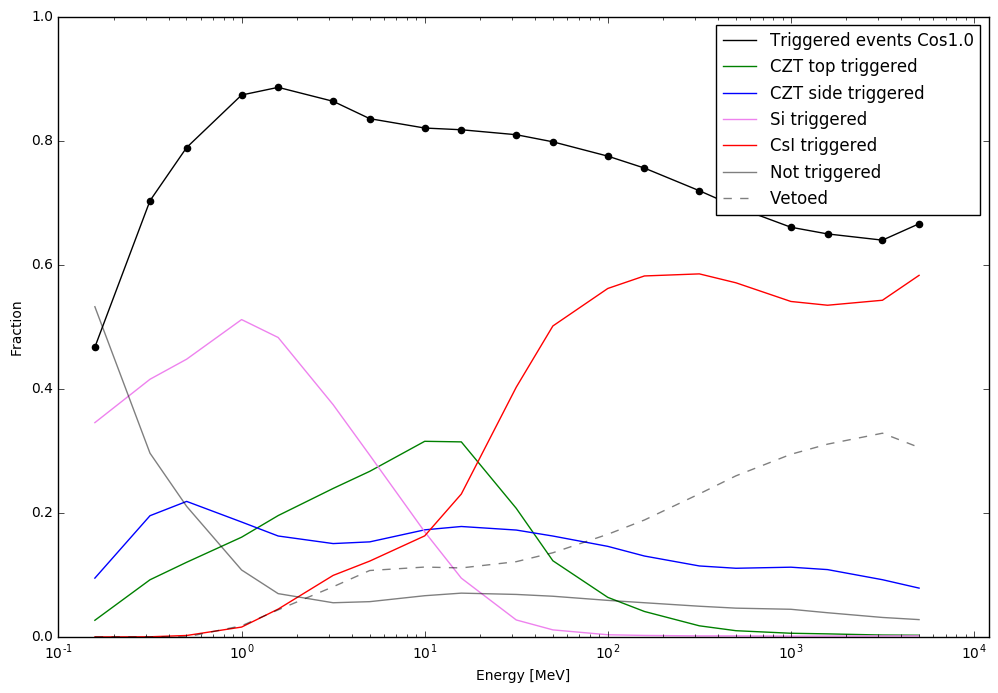

In [5]:
plot.figure(figsize=(12,8))
plot.scatter(energy,triggered, color='black')
plot.plot(energy,triggered, color='black', label='Triggered events %s' % half[0])
plot.plot(energy,czt_top_trigger, color='green', label='CZT top triggered')
plot.plot(energy,czt_side_trigger, color='blue', label='CZT side triggered')
plot.plot(energy,si_trigger, color='violet', label='Si triggered')
plot.plot(energy,csi_trigger, color='red', label='CsI triggered')
plot.plot(energy,not_triggered, color='black', label='Not triggered', alpha=0.5, ls='-')
plot.plot(energy,vetoed, color='black', label='Vetoed',alpha=0.5, ls='--')

plot.xscale('log')
plot.gca().set_ylim([0.,1.0])
plot.gca().set_xlim([0.1,12000.])
plot.ylabel("Fraction")
plot.xlabel("Energy [MeV]")
plot.legend(numpoints=1, scatterpoints=1, frameon=True, loc='upper right')
plot.savefig('TriggerEfficiency_vs_Energy_%s.png' % half[0])
plot.show()

In [10]:
filenames=glob.glob('/data/slag2/jracusin/AMEGO/Simulations/BackgroundFiles/Sims_100s/*tra')


In [29]:
exposure=100.
energy = []
angle = []
vetoed = []
triggered = []
not_triggered = []
czt_top_trigger = []
czt_side_trigger = []
csi_trigger = []
si_trigger = []
component = []
CZT_Top_Found = False
CZT_Side_Found = False
CSI_Found = False
SI_Found = False
#finput = fileinput.input("FarFieldPointSource_3162.277MeV_Cos1.0.inc1.id1.tra")
finput = fileinput.input(filenames)
for line in finput:
    if "OriginalFile" in line:
        linecontents=re.split('[/.]',line)
        component.append(linecontents[8])
#        energy.append(float(linecontents[2].replace('MeV','')))
#        half=linecontents[3].split('.inc1')
#        angle.append(float(half[0].replace('Cos','')))
        CZT_Top_Found = False
        CZT_Side_Found = False
        CSI_Found = False
        SI_Found = False
        print linecontents
        
    if "Not triggered events" in line:
        linecontents = line.split()
        not_triggered.append(float(linecontents[4])/exposure)
        print "Not triggered events  (s^-1): ", float(linecontents[4])/exposure
    if "Number of vetoed events" in line:
        linecontents = line.split()
        vetoed.append(float(linecontents[5])/exposure)
        print "Number of vetoed events (s^-1): ", float(linecontents[5])/exposure
    if "Number of triggered events" in line:
        linecontents = line.split()
        triggered.append(float(linecontents[5])/exposure)
        print "Number of triggered events  (s^-1): ", float(linecontents[5])/exposure
    if "MainTriggerCZT:" in line:
        linecontents = line.split()
        czt_top_trigger.append(float(linecontents[2])/exposure)
        CZT_Top_Found=True
        print "...CZT top triggered events (s^-1): ", float(linecontents[2])/exposure  
    if "MainTriggerCZTSide" in line:
        linecontents = line.split()
        czt_side_trigger.append(float(linecontents[2])/exposure)
        CZT_Side_Found=True
        print "...CZT side triggered events (s^-1): ", float(linecontents[2])/exposure
    if "MainTriggerCsI" in line:
        linecontents = line.split()
        csi_trigger.append(float(linecontents[2])/exposure)
        CSI_Found=True
        print "...CsI triggered events (s^-1): ", float(linecontents[2])/exposure
    if "MainTriggerSi" in line:
        linecontents = line.split()
        si_trigger.append(float(linecontents[2])/exposure)
        SI_Found=True
        print "...Si triggered events (s^-1): ", float(linecontents[2])/exposure
    
    if 'No events available' in line:
        triggered.append(0.)
        not_triggered.append(0.)
        vetoed.append(0.)

    if "STOP" in line:
        if CZT_Top_Found==False:
            czt_top_trigger.append(0.)
            print "No CZT Top triggers found"
        if CZT_Side_Found==False:
            czt_side_trigger.append(0.)
            print "No CZT Side triggers found"
        if CSI_Found==False:
            csi_trigger.append(0.)
            print "No CsI triggers found"
        if SI_Found==False:
            si_trigger.append(0.)
            print "No Si triggers found"
        
    
finput.close()     

vetoed=np.array(vetoed)
triggered=np.array(triggered)
not_triggered=np.array(not_triggered)
czt_top_trigger=np.array(czt_top_trigger)
czt_side_trigger=np.array(czt_side_trigger)
csi_trigger=np.array(csi_trigger)

bkg=OrderedDict([('Component',component),('Triggered',triggered),\
                 ('Vetoed',vetoed),('NotTriggered',not_triggered),\
                 ('MainTriggerCZT',czt_top_trigger),('MainTriggerCZTSide',czt_side_trigger),\
                 ('MainTriggerCSI',csi_trigger),('MainTriggerSi',si_trigger)])

print bkg
#print energy, angle, si_trigger, czt_top_trigger, czt_side_trigger, csi_trigger

['# OriginalFile ', 'data', 'slag2', 'jracusin', 'AMEGO', 'Simulations', 'BackgroundFiles', 'Sims_100s', 'AnnihilationLineHarris', 'inc1', 'id1', 'sim\n']
Not triggered events  (s^-1):  5.11
Number of vetoed events (s^-1):  0.0
Number of triggered events  (s^-1):  14.31
...CZT top triggered events (s^-1):  1.97
...CZT side triggered events (s^-1):  3.97
...Si triggered events (s^-1):  8.37
No CsI triggers found
['# OriginalFile ', 'data', 'slag2', 'jracusin', 'AMEGO', 'Simulations', 'BackgroundFiles', 'Sims_100s', 'AlbedoNeutronsMorrisKole', 'inc1', 'id1', 'sim\n']
No CZT Top triggers found
No CZT Side triggers found
No CsI triggers found
No Si triggers found
['# OriginalFile ', 'data', 'slag2', 'jracusin', 'AMEGO', 'Simulations', 'BackgroundFiles', 'Sims_100s', 'AlbedoPhotonsAjelloMizuno', 'inc1', 'id1', 'sim\n']
Not triggered events  (s^-1):  198.95
Number of vetoed events (s^-1):  47.8
Number of triggered events  (s^-1):  168.96
...CZT top triggered events (s^-1):  21.84
...CZT side

In [30]:
print bkg['Triggered']
print bkg['Component']
len(bkg['Component']),len(bkg['Triggered'])
type(bkg['Triggered'])

[  1.43100000e+01   0.00000000e+00   1.68960000e+02   6.58000000e+00
   9.45000000e+00   8.00000000e+01   7.80000000e-01   2.29200000e+01
   9.30000000e+02   9.18000000e+00   3.72000000e+00]
['AnnihilationLineHarris', 'AlbedoNeutronsMorrisKole', 'AlbedoPhotonsAjelloMizuno', 'CosmicProtonsSpenvis', 'CosmicElectronsMizuno', 'AlbedoPositronsAlcarazMizuno', 'CosmicPositronsMizuno', 'AlbedoElectronsAlcarazMizuno', 'CosmicPhotonsGruber', 'CosmicAlphasSpenvis', 'AlbedoProtonAlcaraz']


numpy.ndarray

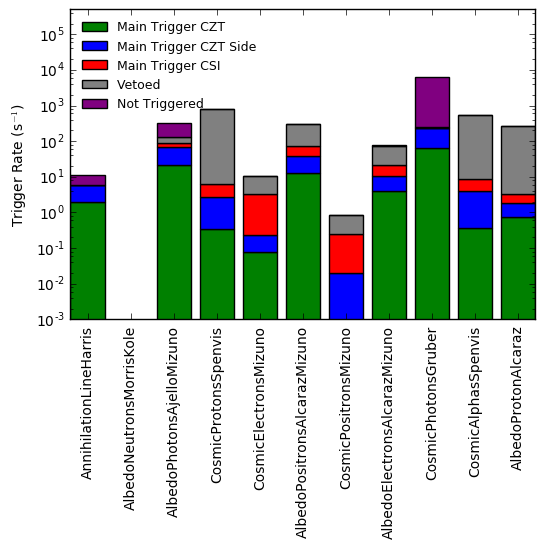

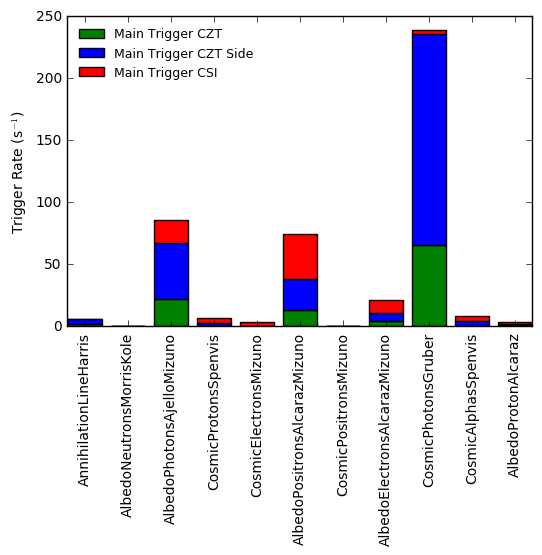

In [33]:
centers=range(len(bkg['Triggered']))

locs,labels=plot.xticks()
plot.setp(labels,rotation=90)
plot.bar(centers,bkg['MainTriggerCZT'],align='center',tick_label=bkg['Component'],label='Main Trigger CZT',color='green')
plot.bar(centers,bkg['MainTriggerCZTSide'],align='center',tick_label=bkg['Component'],label='Main Trigger CZT Side',bottom=bkg['MainTriggerCZT'],color='blue')
plot.bar(centers,bkg['MainTriggerCSI'],align='center',tick_label=bkg['Component'],label='Main Trigger CSI',bottom=(bkg['MainTriggerCZT']+bkg['MainTriggerCZTSide']),color='red')
plot.bar(centers,bkg['Vetoed'],align='center',tick_label=bkg['Component'],label='Vetoed',bottom=(bkg['MainTriggerCZT']+bkg['MainTriggerCZTSide']+bkg['MainTriggerCSI']),color='grey')
plot.bar(centers,bkg['NotTriggered'],align='center',tick_label=bkg['Component'],label='Not Triggered',bottom=(bkg['MainTriggerCZT']+bkg['MainTriggerCZTSide']+bkg['MainTriggerCSI']+bkg['Vetoed']),color='purple')

plot.yscale('log')
plot.ylabel(r'Trigger Rate (s$^{-1}$)')
plot.ylim([1e-3,5e5])
plot.legend(loc='upper left',frameon=False,fontsize=9)
plot.savefig('plots/background_trigger_rate_log.pdf',bbox_inches='tight')

plot.figure()
locs,labels=plot.xticks()
plot.setp(labels,rotation=90)
plot.bar(centers,bkg['MainTriggerCZT'],align='center',tick_label=bkg['Component'],label='Main Trigger CZT',color='green')
plot.bar(centers,bkg['MainTriggerCZTSide'],align='center',tick_label=bkg['Component'],label='Main Trigger CZT Side',bottom=bkg['MainTriggerCZT'],color='blue')
plot.bar(centers,bkg['MainTriggerCSI'],align='center',tick_label=bkg['Component'],label='Main Trigger CSI',bottom=(bkg['MainTriggerCZT']+bkg['MainTriggerCZTSide']),color='red')
#plot.bar(centers,bkg['Vetoed'],align='center',tick_label=bkg['Component'],label='Vetoed',bottom=(bkg['MainTriggerCZT']+bkg['MainTriggerCZTSide']+bkg['MainTriggerCSI']),color='grey')
#plot.bar(centers,bkg['NotTriggered'],align='center',tick_label=bkg['Component'],label='Not Triggered',bottom=(bkg['MainTriggerCZT']+bkg['MainTriggerCZTSide']+bkg['MainTriggerCSI']+bkg['Vetoed']),color='purple')

plot.ylabel(r'Trigger Rate (s$^{-1}$)')
plot.legend(loc='upper left',frameon=False,fontsize=9)
plot.savefig('plots/background_trigger_rate.pdf',bbox_inches='tight')
plot.show()